In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

To determine the potential customers we need Spending score column because the customer that buys too much from mall will surely have high spending score. Now since we are creating kmeans clustering for 2D dataset then for that we can consider different columns one by one that will be taken with Spending score column to determine potential customers by clustering them in some categories.


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.loc[:,'Gender'] = le.fit_transform(data.loc[:,"Gender"])
data.head()

#1 for male and 0 for female

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
#dropping CustomerId since it is not that relevant in our problem
data = data.drop('CustomerID',axis = 1)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [6]:
# considering income column with spending score column
x1 = data.iloc[:,2:].values
x1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

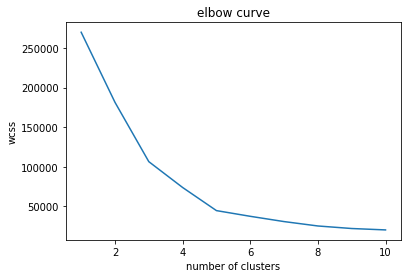

In [7]:
# elbow curve method for finding out ideal number of clusters 
from sklearn.cluster import KMeans

wcss = []
# using loops to check each number of cluster one by one to calculate sse(sum of squared errors)
for i in range(1,11):
    k1 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 25, n_init = 10)
    k1.fit(x1)
    wcss.append(k1.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
plt.plot(range(1,11),wcss)
plt.title('elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Ideal number of clusters for given dataset = 5

In [8]:
k1 = KMeans(n_clusters = 5 , init = 'k-means++', max_iter = 100, n_init = 10)
y_kmeans = k1.fit_predict(x1)

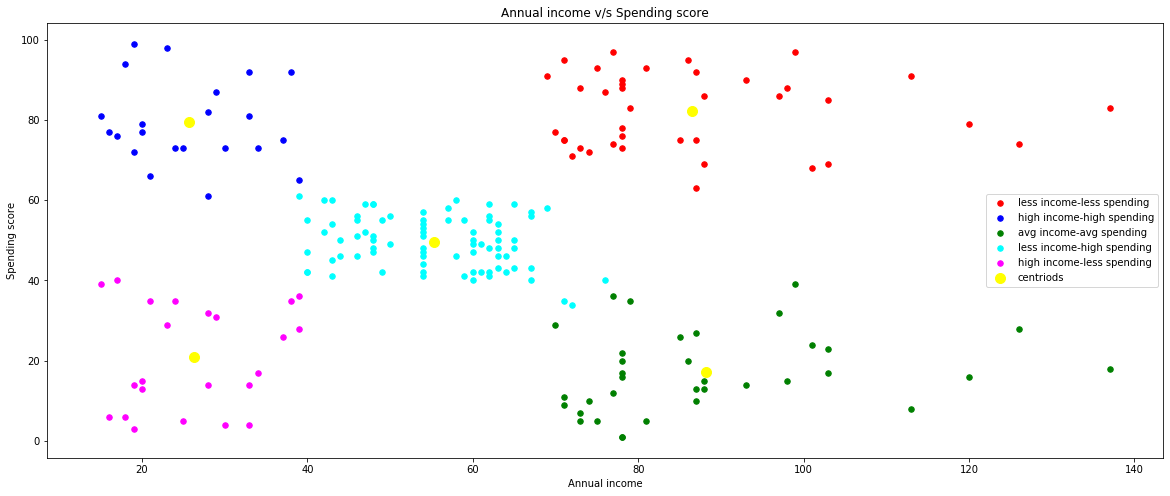

In [9]:
# plotting scatter plot to plot out clusters with their centroids
plt.figure(figsize = (20,8))
plt.scatter(x1[y_kmeans==0,0],x1[y_kmeans==0,1],s=30,c='red',label = 'less income-less spending')
plt.scatter(x1[y_kmeans==1,0],x1[y_kmeans==1,1],s=30,c='blue',label = 'high income-high spending')
plt.scatter(x1[y_kmeans==2,0],x1[y_kmeans==2,1],s=30,c='green',label = 'avg income-avg spending')
plt.scatter(x1[y_kmeans==3,0],x1[y_kmeans==3,1],s=30,c='cyan',label = 'less income-high spending')
plt.scatter(x1[y_kmeans==4,0],x1[y_kmeans==4,1],s=30,c='magenta',label = 'high income-less spending')
plt.scatter(k1.cluster_centers_[:,0],k1.cluster_centers_[:,1],s=100,c='yellow',label = 'centriods')
plt.title('Annual income v/s Spending score')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

Now through this scatter plot we observe the following things :

1. less income-less spending : represented with red dots ..these are the customer that does not have that high income so that they can buy a product from the mall that's why they are less likely to be our potential customers and thus it will not be that feasable for us to invest on them for marketing about our offers and product information.

2. high income-high spending : represented with blue dots .. these customers have the salary to buy products from mall tha0t's why these are our potential customers doing proper marketing will provide good profit to mall.

3. average income-average spending : represented by green dots .. these are the customers that have an average income, they may or may not have a chance to buy product from mall. But still we can do marketing but the extent of this marketing will be less as compared to our potential customers.

4. less income-high spending : represented by cyan dots .. these are the customers that have less salary but they used to spend a lot of their money on buying product from mall thus they can also be consider as our potential customers. Thus we can invest on them for marketing about our offers and product info.

5. high income-less spending : represented by magenta dots .. these are the customers that have high salary but they don't do shopping that much and for that reason they are not our potential customers 



